# Iris flower classification ML project 🤖

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [5]:
# importing iris dataset from drive 
data_frame = pd.read_csv('iris_data.csv')

#lets read the data with the help of .head()
data_frame.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
# and more let see data information with .info()
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
#checking if there is a any null value with .isnull() and sum()

data_frame.isnull().sum()
#looks like a there is no null values 

5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64

In [8]:
# we are going to use .describe() function 
data_frame.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data_frame.describe()

#there isn't any unwanted column that we want to remove or have to remove so we are not using .drop() 
#and we are moving straight to visulaization phase 

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#reviewing the column 
data_frame['sepal_length'].value_counts()

5.0    10
6.3     9
5.1     8
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
4.6     4
6.2     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: sepal_length, dtype: int64

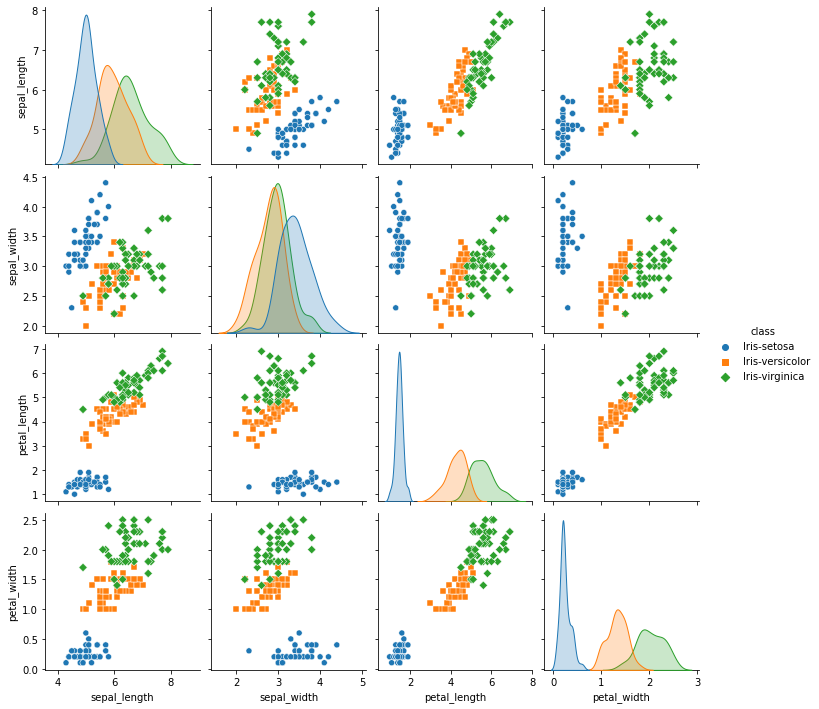

In [10]:
# Exploratory Data Analysis (EDA)
sns.pairplot(data_frame, hue='class', markers=['o', 's', 'D'])
plt.show()

In [11]:
# Split the dataset into training and testing sets
X = data_frame.drop('class', axis=1)
y = data_frame['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
#printing X_train just to insure that the split was perfect 
X_train

,sepal_length,sepal_width,petal_length,petal_width
116,7.7,3.8,6.7,2.2
66,5.8,2.7,4.1,1.0
78,5.7,2.6,3.5,1.0
71,6.3,2.5,4.9,1.5
131,6.4,2.8,5.6,2.2
...,...,...,...,...
9,5.4,3.7,1.5,0.2
103,6.5,3.0,5.8,2.2
67,6.2,2.2,4.5,1.5
117,7.7,2.6,6.9,2.3


In [13]:
# Train the K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
# Train the K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
# Generate the predicted values
y_pred = knn.predict(X_test)

In [16]:
# Evaluate the performance of the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16  0  0]
 [ 0 15  1]
 [ 0  3 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.83      0.94      0.88        16
 Iris-virginica       0.91      0.77      0.83        13

       accuracy                           0.91        45
      macro avg       0.91      0.90      0.91        45
   weighted avg       0.91      0.91      0.91        45

